### 1. 데이터 로드 및 전처리

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

# 1. 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
data = df = pd.read_csv(URL+"data/svdd_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 글꼴 설치-jupyter

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

!apt-get update -qq
!apt-get install fonts-nanum* -qq

warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
data.head(5)

0         1  Y
0  1.040235 -1.873163  1
1 -0.287562  3.278405  1
2  1.100316  3.462647  1
3  2.008401  0.555708  1
4 -0.968919 -2.632187  1

### git-hub에 있는 코드를 활용하는 방법-1

In [4]:
!git clone https://github.com/iqiukp/SVDD-Python.git


fatal: destination path 'SVDD-Python' already exists and is not an empty directory.


In [5]:
%cd SVDD-Python/src

/content/SVDD-Python/src


In [6]:
import os
current_directory = os.getcwd()
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: /content/SVDD-Python/src


In [7]:
!cp BaseSVDD.py /content

In [8]:
!pwd

/content/SVDD-Python/src


In [9]:
%cd /content

/content


### git-hub에 있는 코드를 활용하는 방법-2: 다운 받아서 현재 실행중인 ipynb과 동일한 경로에 위치

In [45]:
import sys
# 모듈을 검색할때 참고할 디렉토리 항목을 추가함
sys.path.append('/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/')

In [46]:
from sklearn.datasets import load_wine
from BaseSVDD import BaseSVDD, BananaDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib

In [13]:
X = data.iloc[:,:-1].values

y = np.array(data['Y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify=y)
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

### 2. 선형 SVDD 모델 학습 및 결과 확인
- https://github.com/iqiukp/SVDD-Python 참고
- BaseSVDD.py 파일 추가 되어 있는지 확인



*** Fitting of the SVDD model is completed. ***

running time         = 0.1055 seconds
kernel function      = linear
iterations           = 10
number of samples    = 70
number of features   = 2
number of SVs        = 3
ratio of SVs         = 4.2857 %
accuracy             = 78.5714 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.1006 seconds



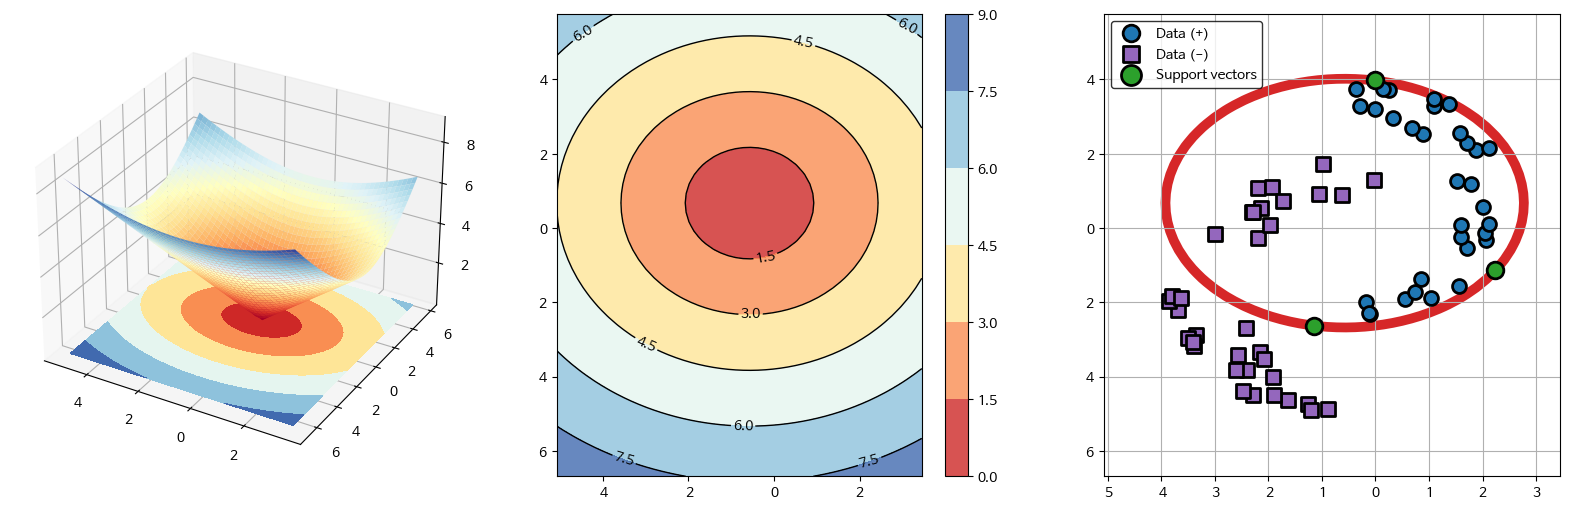



*** Prediction of the provided data is completed. ***

running time         = 0.0024 seconds
number of samples    = 30
number of alarm      = 8
accuracy             = 76.6667 %




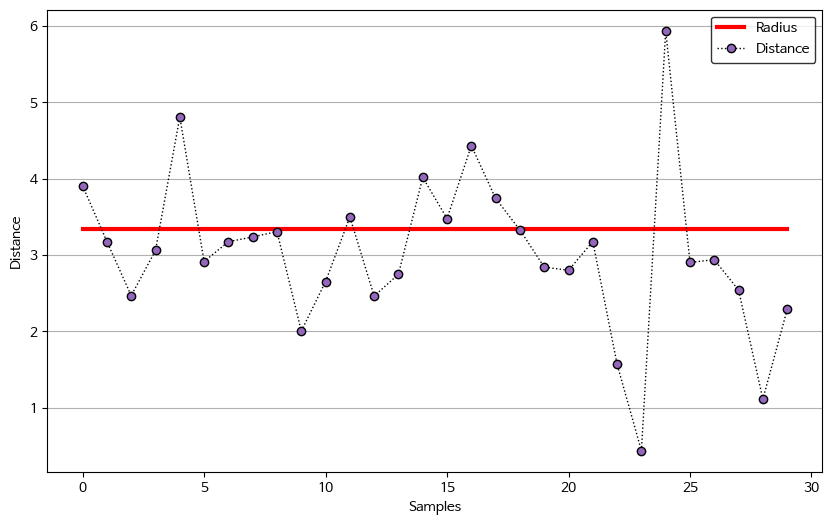

In [16]:
for CC in [0.5]:
    svdd = BaseSVDD(C=CC, gamma=0.1, kernel='linear', display='on')
    svdd.fit(X_train,  y_train)
    svdd.plot_boundary(X_train,  y_train)
    y_test_predict = svdd.predict(X_test, y_test)
    radius = svdd.radius
    distance = svdd.get_distance(X_test)
    svdd.plot_distance(radius, distance)

### 3. 비선형 SVDD 모델 학습 및 결과 확인



*** Fitting of the SVDD model is completed. ***

running time         = 0.0360 seconds
kernel function      = rbf
iterations           = 9
number of samples    = 70
number of features   = 2
number of SVs        = 23
ratio of SVs         = 32.8571 %
accuracy             = 84.2857 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.2517 seconds



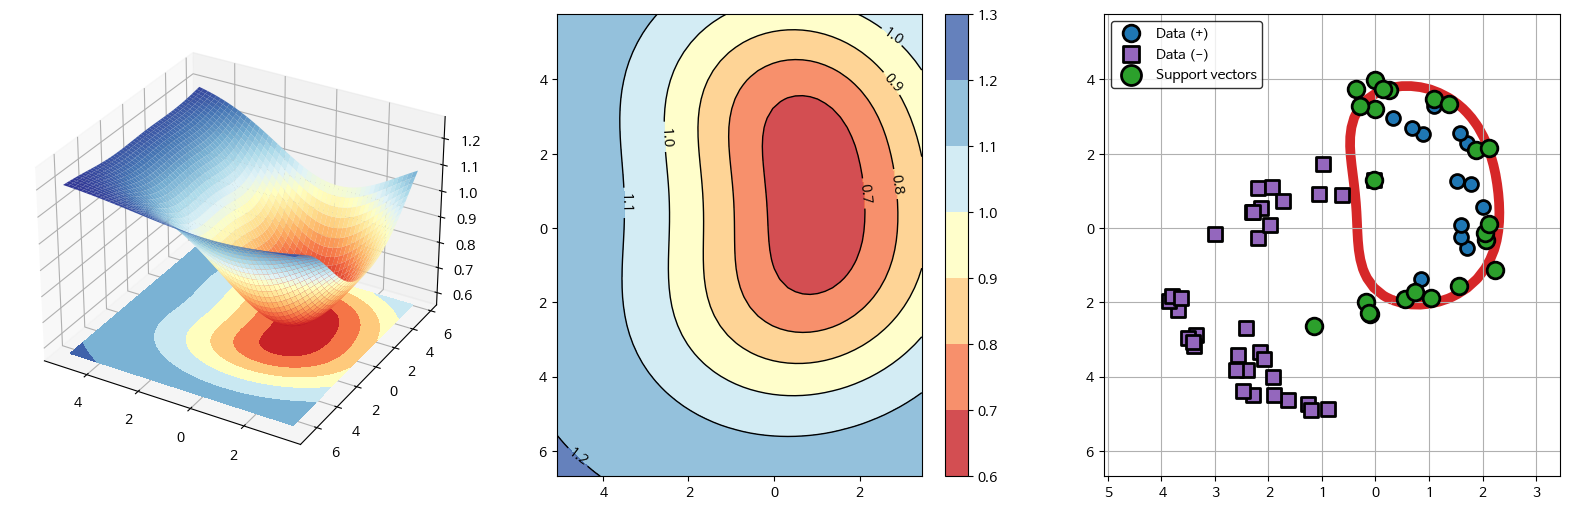



*** Prediction of the provided data is completed. ***

running time         = 0.0029 seconds
number of samples    = 30
number of alarm      = 19
accuracy             = 86.6667 %




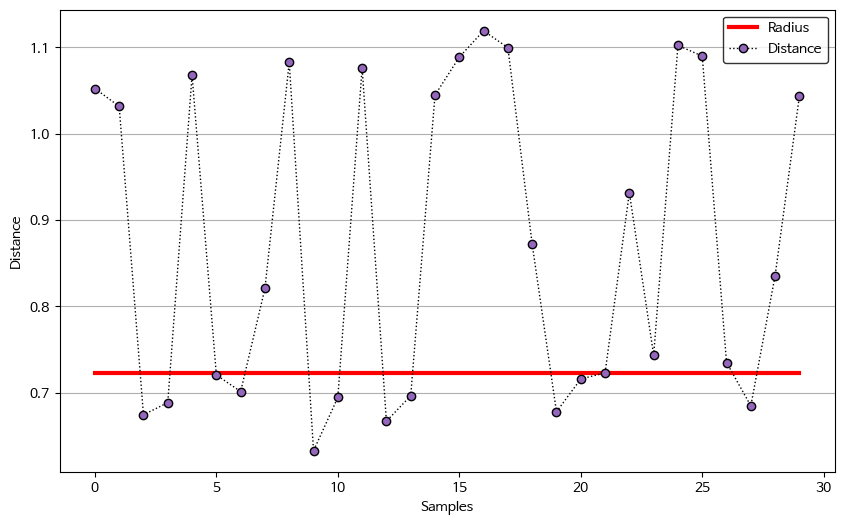



*** Fitting of the SVDD model is completed. ***

running time         = 0.0496 seconds
kernel function      = rbf
iterations           = 10
number of samples    = 70
number of features   = 2
number of SVs        = 14
ratio of SVs         = 20.0000 %
accuracy             = 92.8571 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.2841 seconds



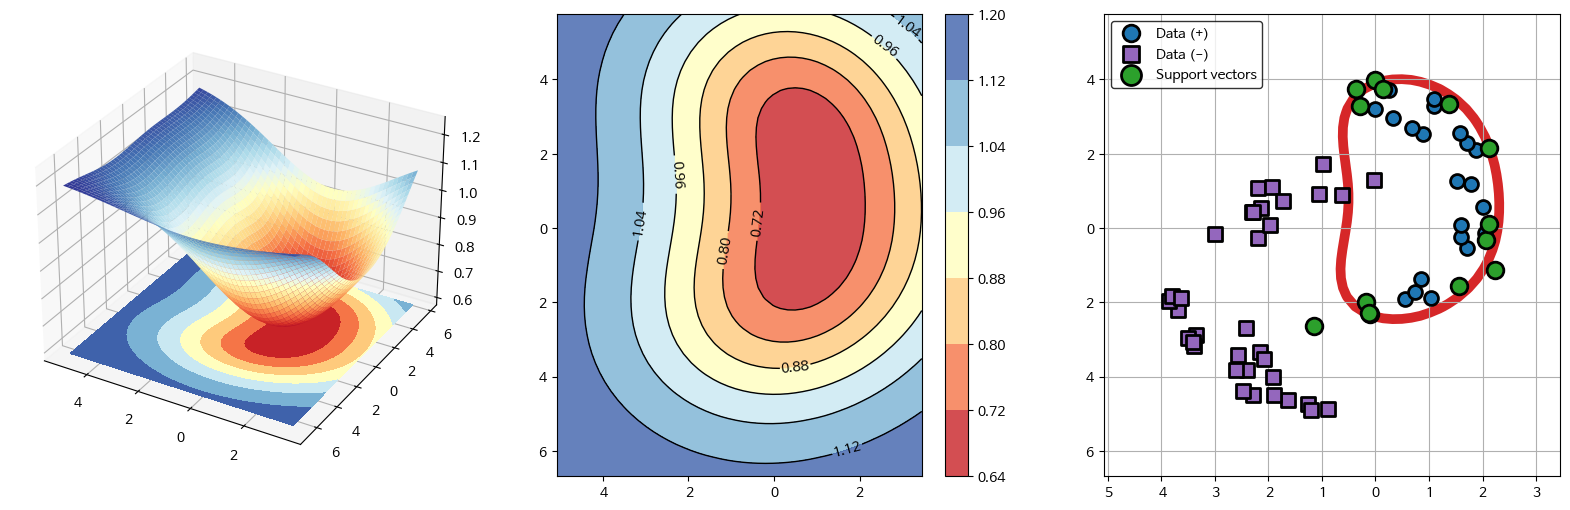



*** Prediction of the provided data is completed. ***

running time         = 0.0071 seconds
number of samples    = 30
number of alarm      = 17
accuracy             = 93.3333 %




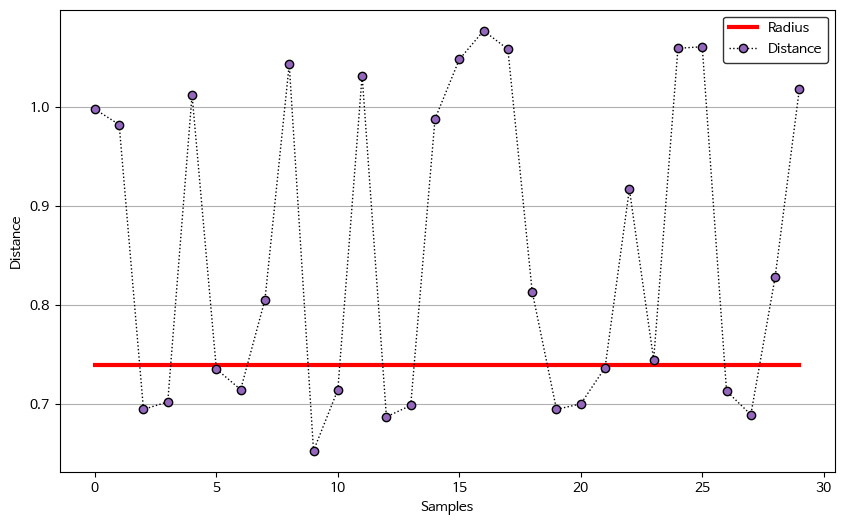



*** Fitting of the SVDD model is completed. ***

running time         = 0.0203 seconds
kernel function      = rbf
iterations           = 9
number of samples    = 70
number of features   = 2
number of SVs        = 5
ratio of SVs         = 7.1429 %
accuracy             = 94.2857 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.1829 seconds



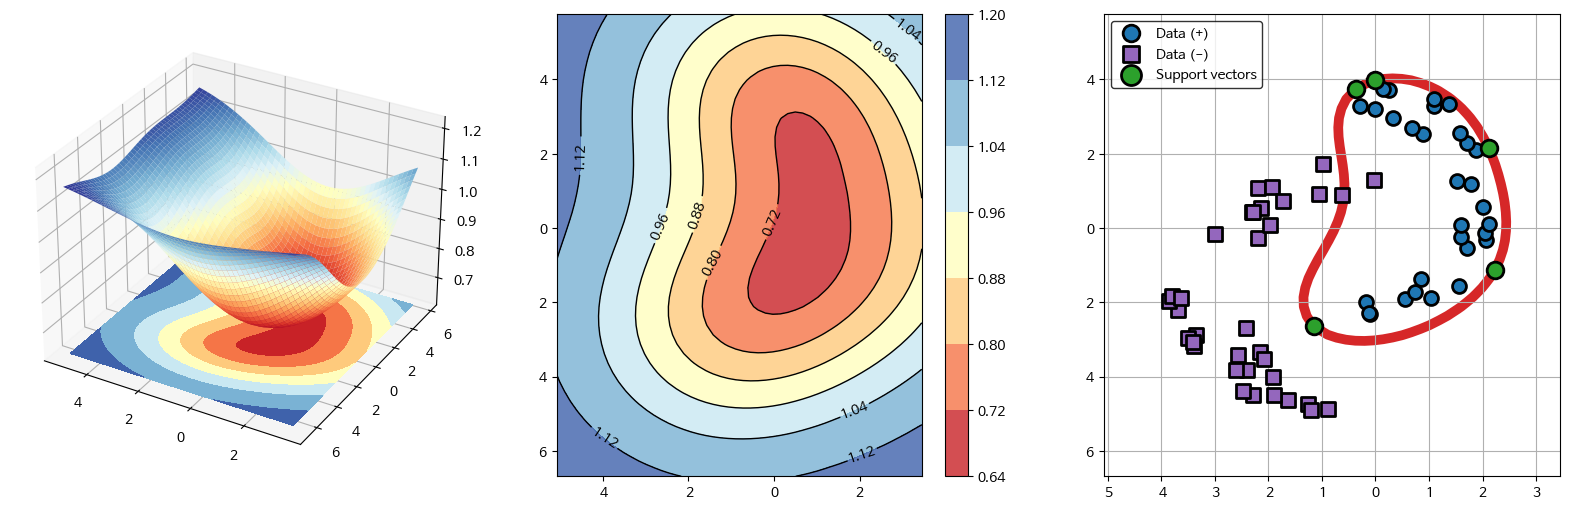



*** Prediction of the provided data is completed. ***

running time         = 0.0043 seconds
number of samples    = 30
number of alarm      = 16
accuracy             = 90.0000 %




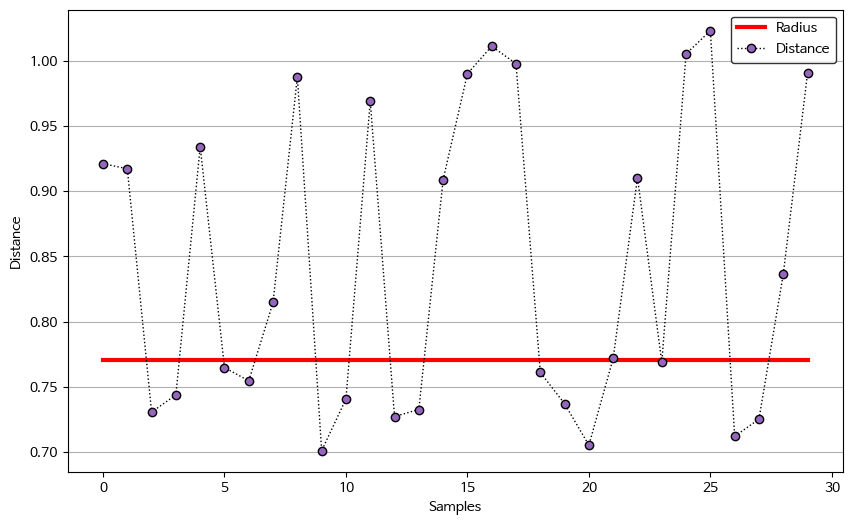

In [17]:
# C 값의 범위 설정->여기서는 총 3가지 값에 대해 실험
for CC in [0.05,0.1,0.9]:
    svdd = BaseSVDD(C=CC, gamma=0.085, kernel='rbf', display='on')
    svdd.fit(X_train,  y_train)
    svdd.plot_boundary(X_train,  y_train)
    y_test_predict = svdd.predict(X_test, y_test)
    radius = svdd.radius
    distance = svdd.get_distance(X_test)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.0193 seconds
kernel function      = rbf
iterations           = 10
number of samples    = 70
number of features   = 2
number of SVs        = 24
ratio of SVs         = 34.2857 %
accuracy             = 87.1429 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.2235 seconds



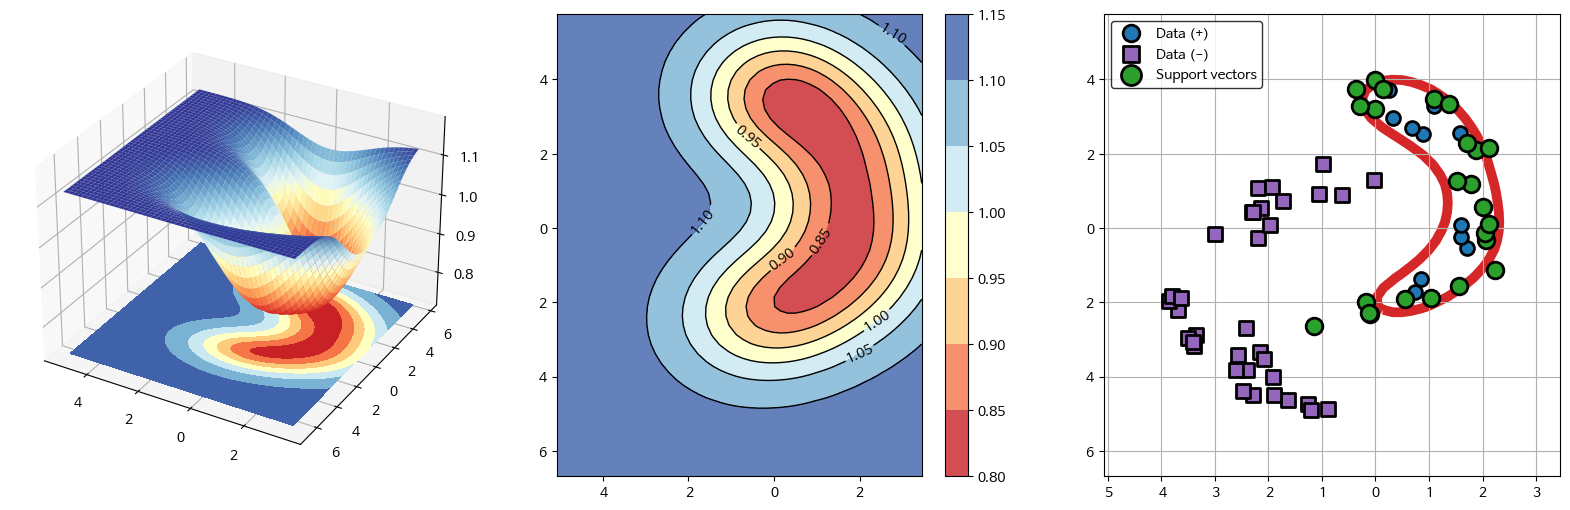



*** Prediction of the provided data is completed. ***

running time         = 0.0040 seconds
number of samples    = 30
number of alarm      = 19
accuracy             = 86.6667 %




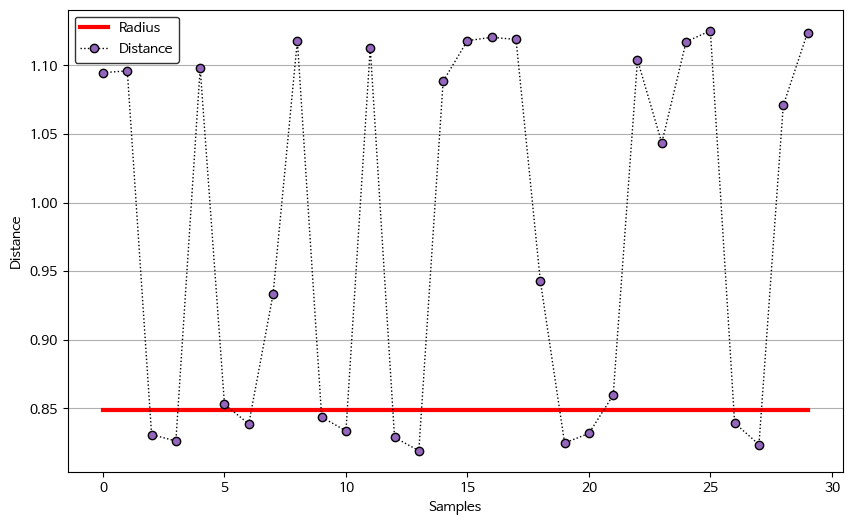



*** Fitting of the SVDD model is completed. ***

running time         = 0.0215 seconds
kernel function      = rbf
iterations           = 10
number of samples    = 70
number of features   = 2
number of SVs        = 14
ratio of SVs         = 20.0000 %
accuracy             = 95.7143 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.1884 seconds



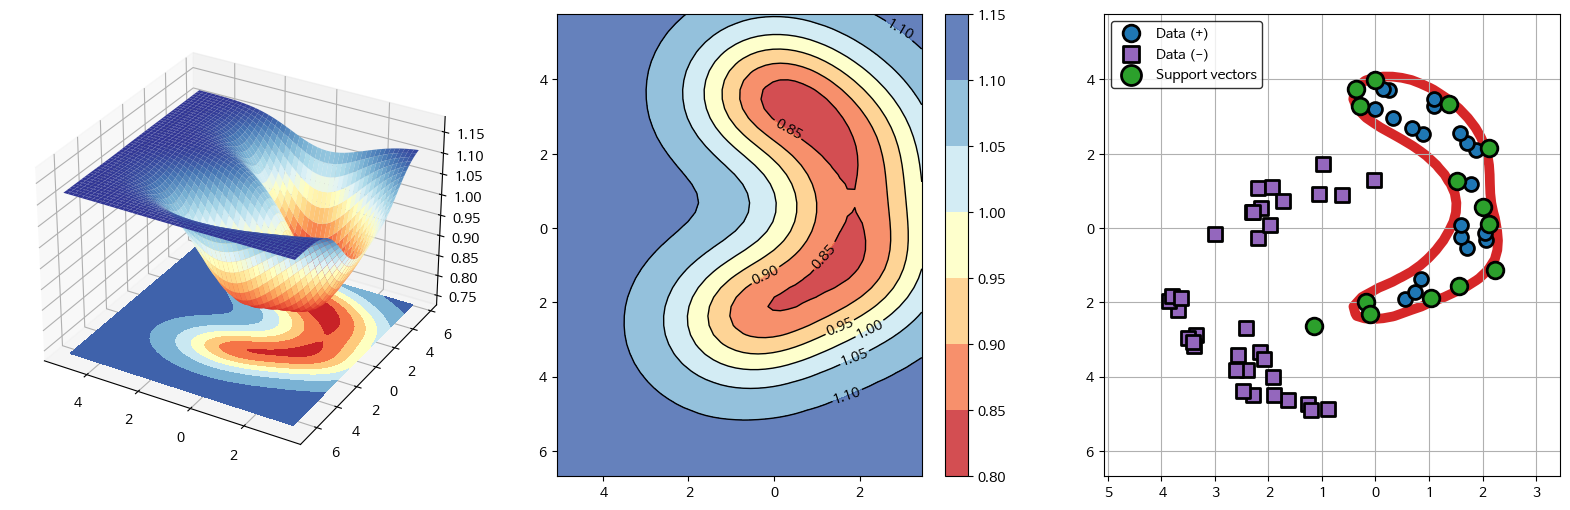



*** Prediction of the provided data is completed. ***

running time         = 0.0046 seconds
number of samples    = 30
number of alarm      = 19
accuracy             = 86.6667 %




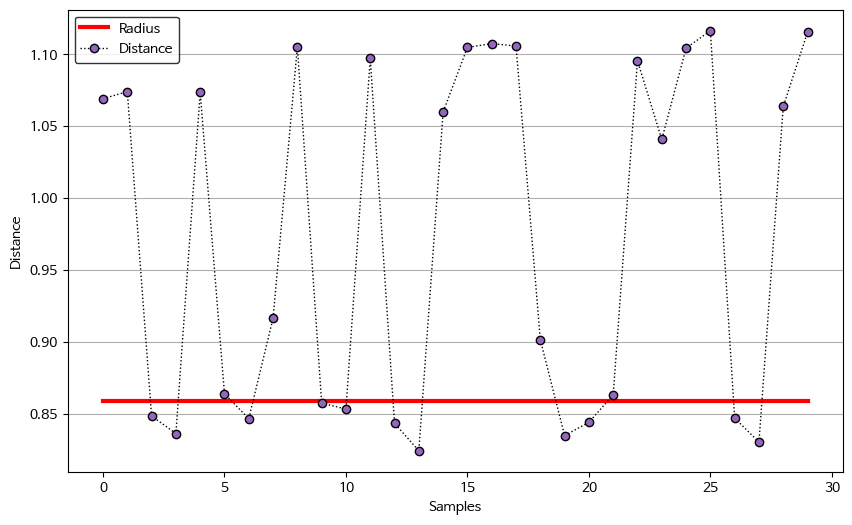



*** Fitting of the SVDD model is completed. ***

running time         = 0.0207 seconds
kernel function      = rbf
iterations           = 10
number of samples    = 70
number of features   = 2
number of SVs        = 11
ratio of SVs         = 15.7143 %
accuracy             = 85.7143 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.1861 seconds



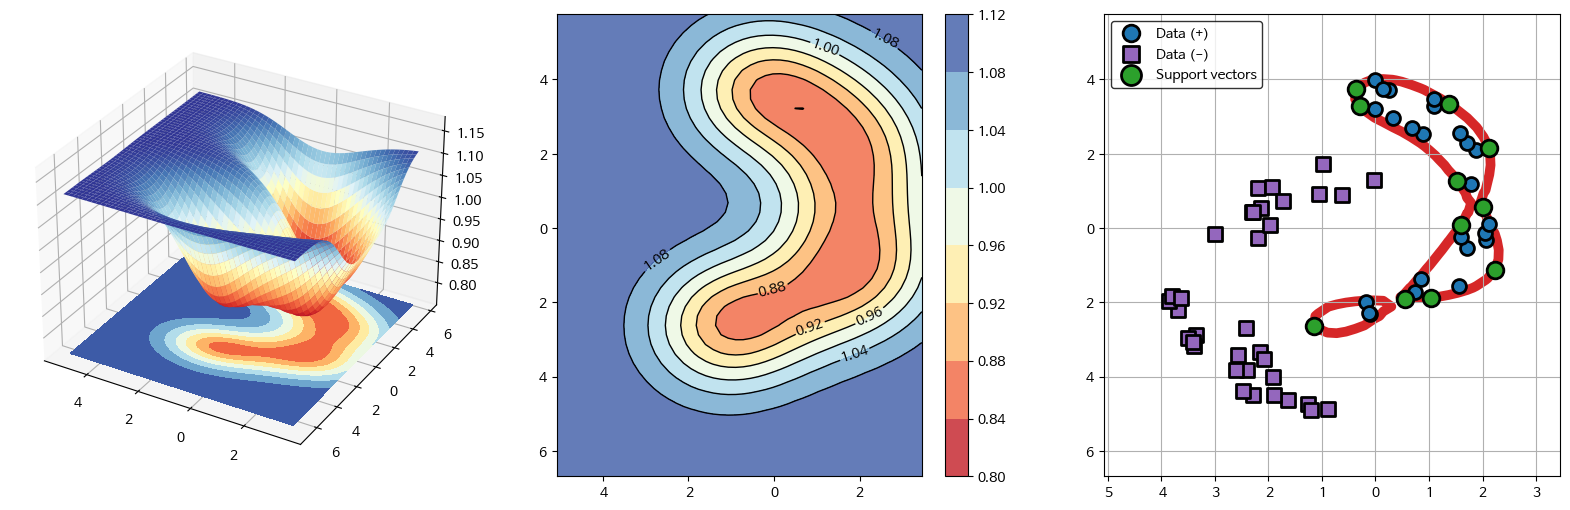



*** Prediction of the provided data is completed. ***

running time         = 0.0090 seconds
number of samples    = 30
number of alarm      = 21
accuracy             = 80.0000 %




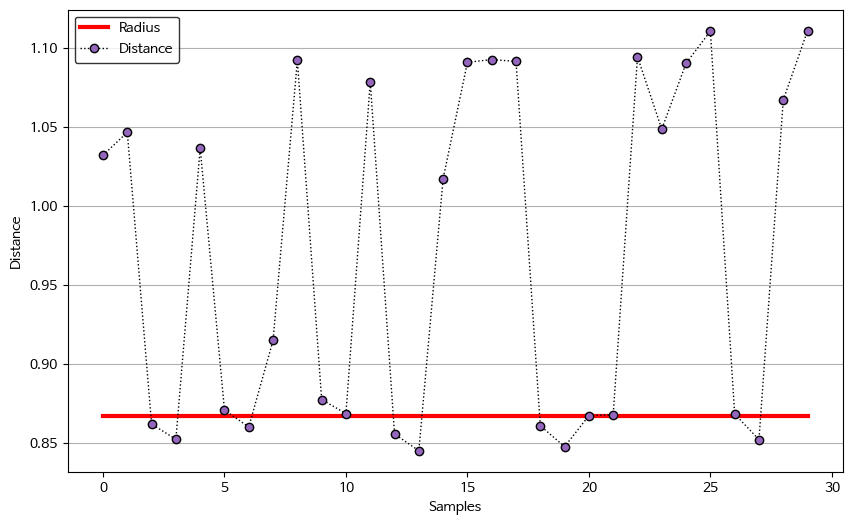

In [18]:
#gamma 크기 변화
for CC in [0.05,0.1,0.9]:
    svdd = BaseSVDD(C=CC, gamma=0.3, kernel='rbf', display='on')
    svdd.fit(X_train,  y_train)
    svdd.plot_boundary(X_train,  y_train)
    y_test_predict = svdd.predict(X_test, y_test)
    radius = svdd.radius
    distance = svdd.get_distance(X_test)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.0253 seconds
kernel function      = poly
iterations           = 15
number of samples    = 70
number of features   = 2
number of SVs        = 20
ratio of SVs         = 28.5714 %
accuracy             = 72.8571 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.4110 seconds



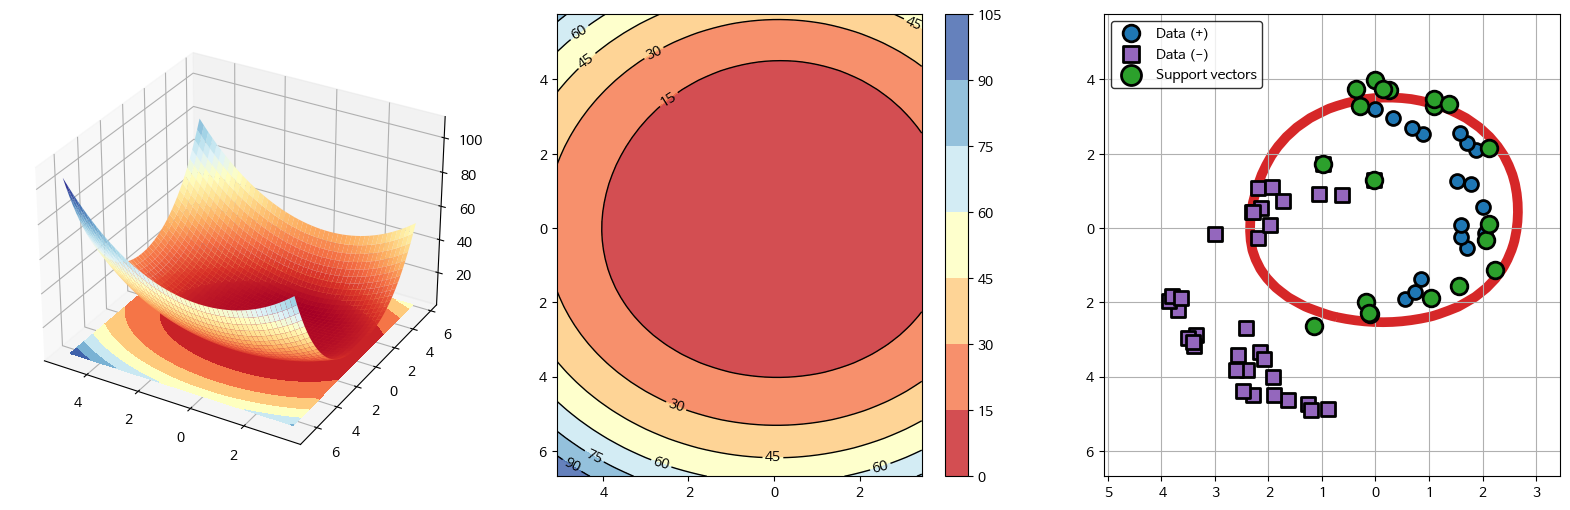



*** Prediction of the provided data is completed. ***

running time         = 0.0022 seconds
number of samples    = 30
number of alarm      = 14
accuracy             = 83.3333 %




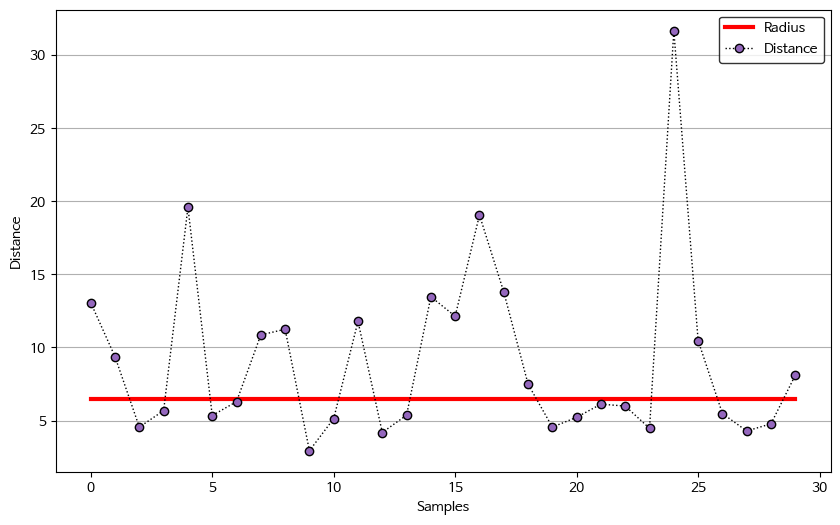



*** Fitting of the SVDD model is completed. ***

running time         = 0.0662 seconds
kernel function      = poly
iterations           = 15
number of samples    = 70
number of features   = 2
number of SVs        = 11
ratio of SVs         = 15.7143 %
accuracy             = 82.8571 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.3053 seconds



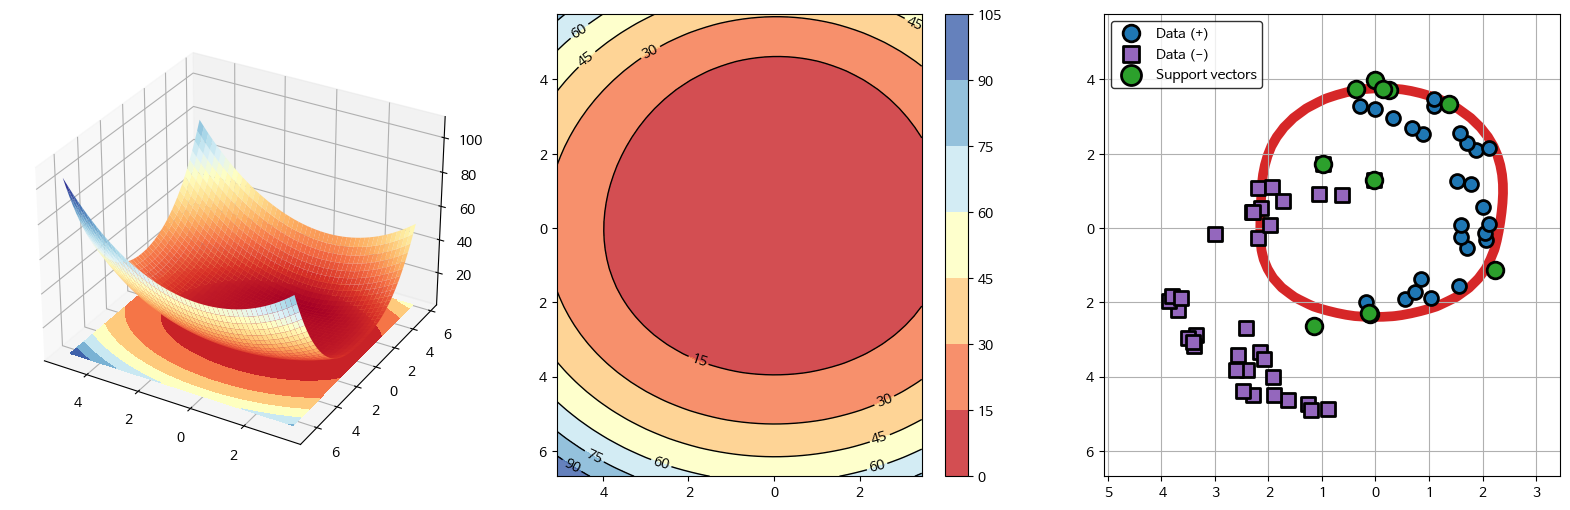



*** Prediction of the provided data is completed. ***

running time         = 0.0032 seconds
number of samples    = 30
number of alarm      = 14
accuracy             = 83.3333 %




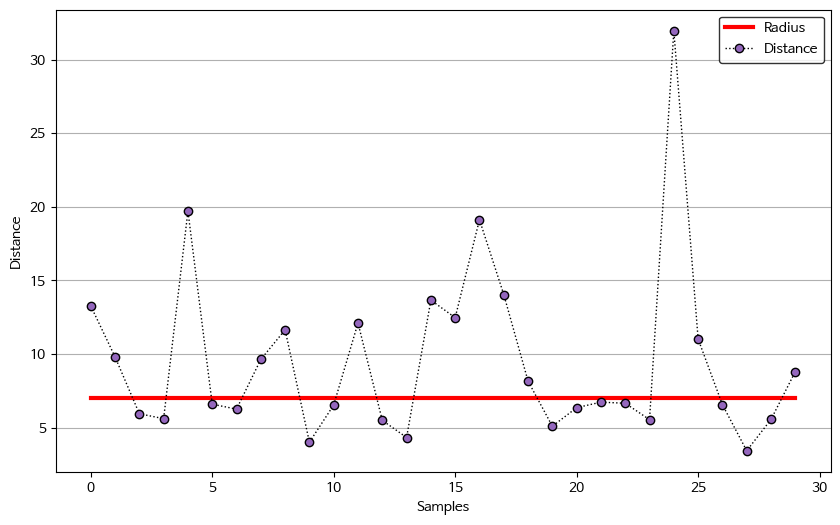



*** Fitting of the SVDD model is completed. ***

running time         = 0.0350 seconds
kernel function      = poly
iterations           = 15
number of samples    = 70
number of features   = 2
number of SVs        = 4
ratio of SVs         = 5.7143 %
accuracy             = 78.5714 %


Calculating the grid scores (0050*0050)...

Calculation of the grid scores is completed. Time cost 0.2756 seconds



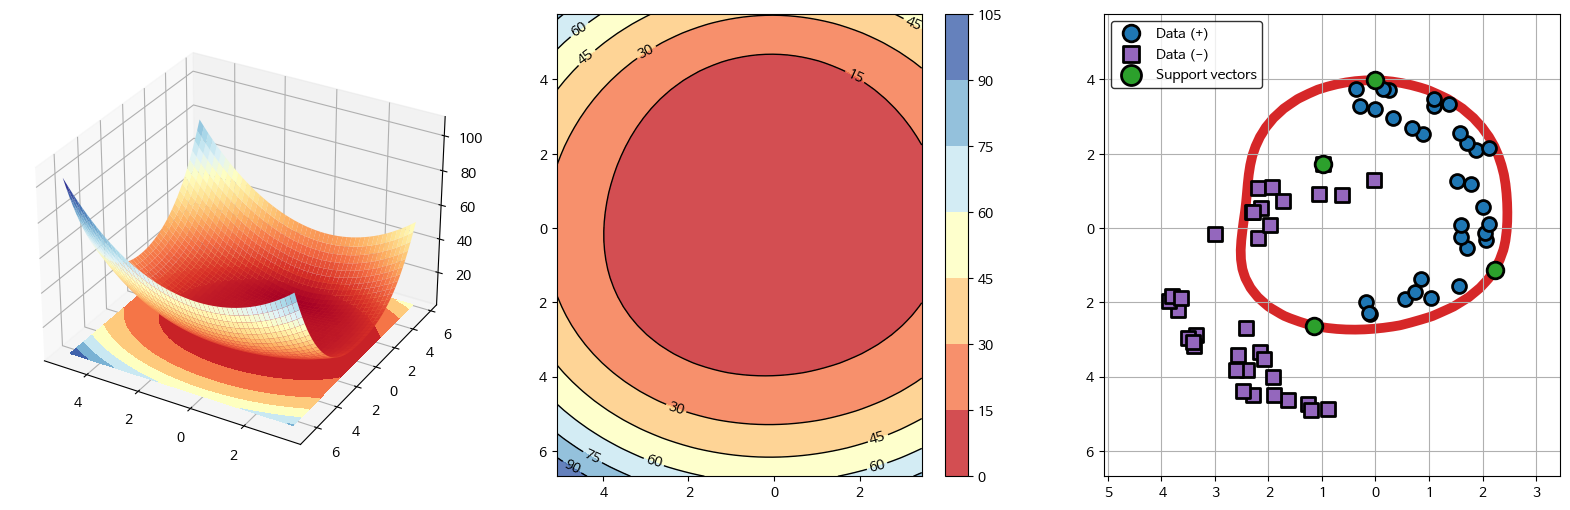



*** Prediction of the provided data is completed. ***

running time         = 0.0030 seconds
number of samples    = 30
number of alarm      = 13
accuracy             = 86.6667 %




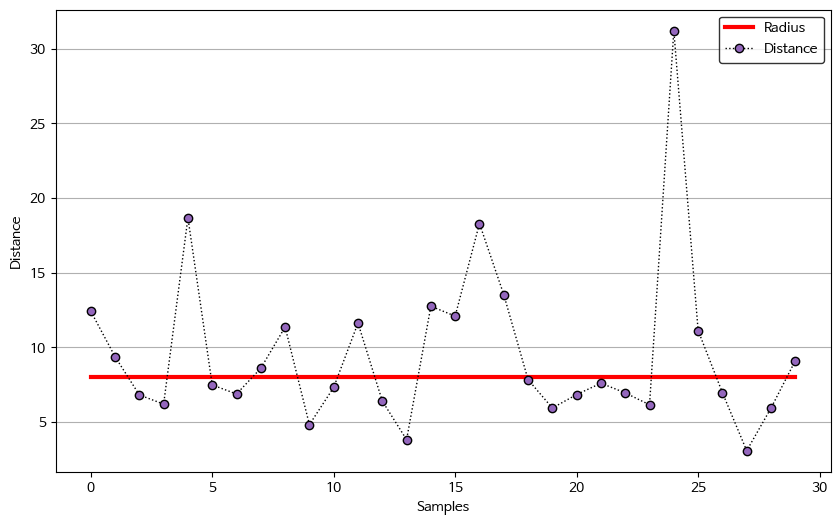

In [44]:
#kernel 변경-> 'poly'
svdd = BaseSVDD(C=0.5, gamma=0.2, kernel='poly',degree = 15, display='on', coef0=5)
for CC in [0.05,0.1,0.9]:
    svdd = BaseSVDD(C=CC, gamma=0.3, kernel='poly', display='on')
    svdd.fit(X_train,  y_train)
    svdd.plot_boundary(X_train,  y_train)
    y_test_predict = svdd.predict(X_test, y_test)
    radius = svdd.radius
    distance = svdd.get_distance(X_test)
    svdd.plot_distance(radius, distance)

In [42]:
#하이퍼파라미터들에 대해 gridsearch 진행
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly'],

}
# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = BaseSVDD(kernel=params2["kernel"],gamma = params2["gamma"],C = params2["C"], display= 'off')
  model_use.fit(X_train, y_train)
  valid_pred = model_use.predict(X_test)
  tem = accuracy_score(valid_pred,y_test) # 성능지표 = accuracy_score 사용
  score_list.append(tem)


# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 accuracy_score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.9333333333333333
BEST PARAMS {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
